In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/train_final.csv")
xgb_model = joblib.load("../models/xgb_model.pkl")
lgb_model = joblib.load("../models/lgb_model.pkl")


Time split

In [2]:
df = df.sort_values("date")
split_idx = int(len(df) * 0.8)
val_df = df.iloc[split_idx:]

X_val = val_df.drop(columns=["sales", "date"])
y_val = val_df["sales"]


Plot comparison

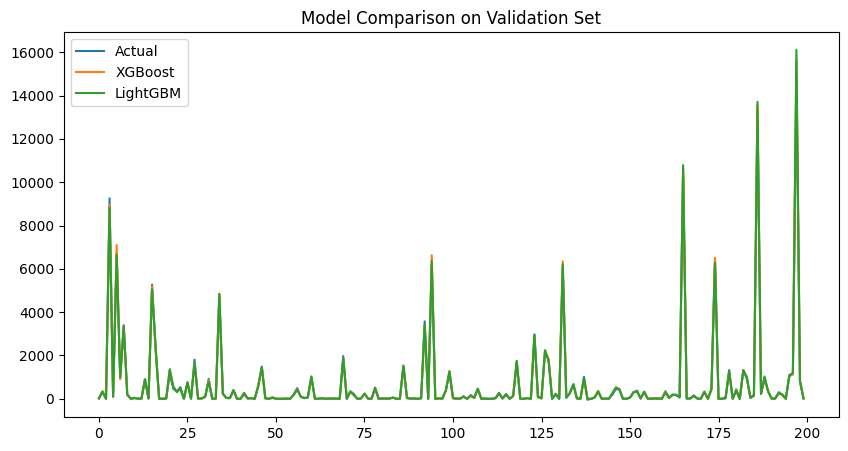

In [3]:
xgb_preds = xgb_model.predict(X_val)
lgb_preds = lgb_model.predict(X_val)

plt.figure(figsize=(10,5))
plt.plot(y_val.values[:200], label="Actual")
plt.plot(xgb_preds[:200], label="XGBoost")
plt.plot(lgb_preds[:200], label="LightGBM")
plt.legend()
plt.title("Model Comparison on Validation Set")
plt.show()
